In [7]:
%pip install pandas matplotlib seaborn wordcloud squarify scikit-learn 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Load data
data = pd.read_csv("../Global_AI_Content_Impact_Dataset.csv")

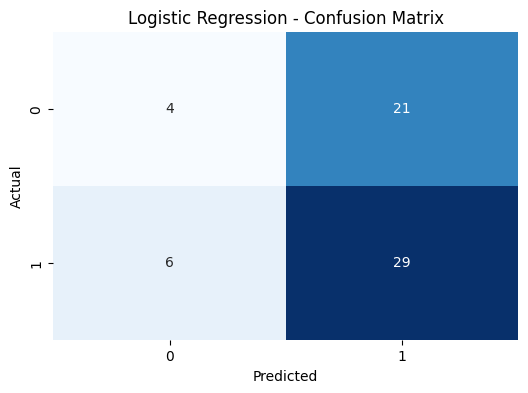


Logistic Regression - Evaluation Metrics:
Accuracy: 0.5500
Precision: 0.5800
Recall: 0.8286
F1 Score: 0.6824

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.16      0.23        25
           1       0.58      0.83      0.68        35

    accuracy                           0.55        60
   macro avg       0.49      0.49      0.46        60
weighted avg       0.51      0.55      0.49        60



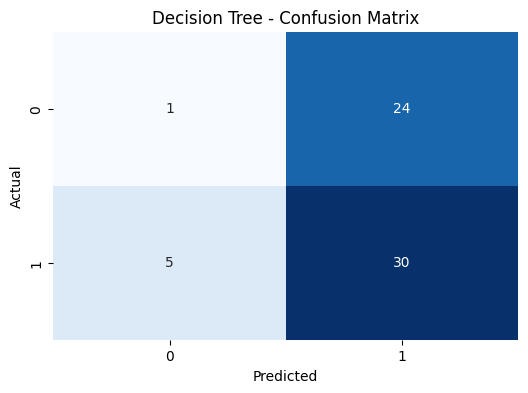


Decision Tree - Evaluation Metrics:
Accuracy: 0.5167
Precision: 0.5556
Recall: 0.8571
F1 Score: 0.6742

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.04      0.06        25
           1       0.56      0.86      0.67        35

    accuracy                           0.52        60
   macro avg       0.36      0.45      0.37        60
weighted avg       0.39      0.52      0.42        60



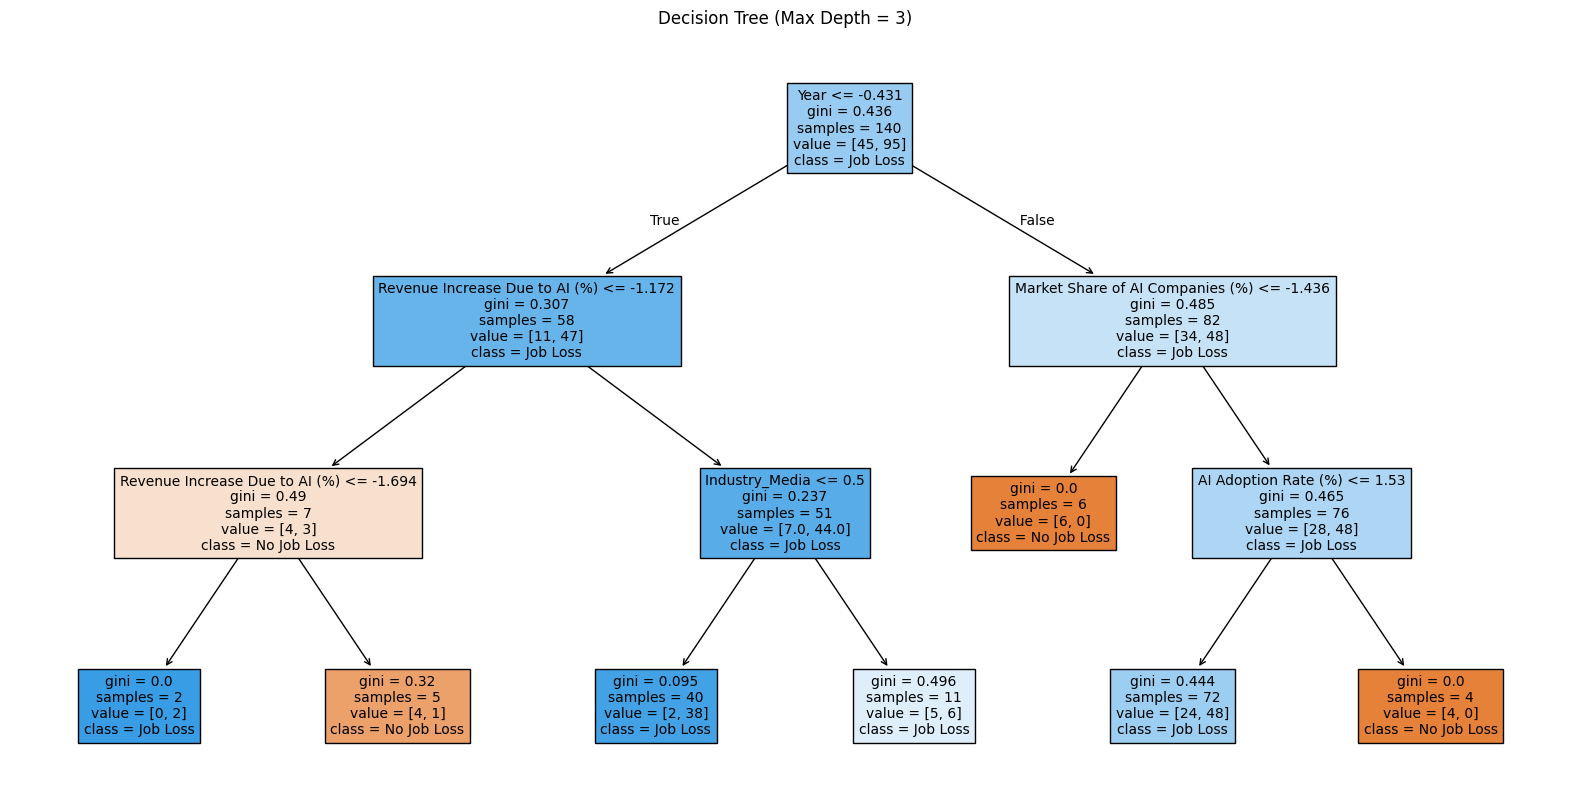

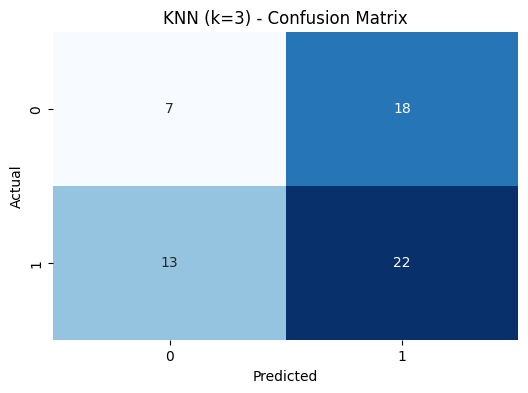


KNN (k=3) - Evaluation Metrics:
Accuracy: 0.4833
Precision: 0.5500
Recall: 0.6286
F1 Score: 0.5867

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.28      0.31        25
           1       0.55      0.63      0.59        35

    accuracy                           0.48        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.47      0.48      0.47        60



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# ----------------------------
# 1. Prepare Data
# ----------------------------
data['Job Loss Binary'] = (data['Job Loss Due to AI (%)'] > 20).astype(int)

X = data[['Country', 'Year', 'Industry', 'AI Adoption Rate (%)', 
        'AI-Generated Content Volume (TBs per year)', 'Revenue Increase Due to AI (%)', 
        'Human-AI Collaboration Rate (%)', 'Consumer Trust in AI (%)', 
        'Market Share of AI Companies (%)', 'Regulation Status']]
y = data['Job Loss Binary']

categorical_features = ['Country', 'Industry', 'Regulation Status']
numerical_features = ['Year', 'AI Adoption Rate (%)', 'AI-Generated Content Volume (TBs per year)',
                    'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
                    'Consumer Trust in AI (%)', 'Market Share of AI Companies (%)']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# ----------------------------
# 2. Define Models
# ----------------------------
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------------------------
# 3. Train and Evaluate Models
# ----------------------------
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Evaluation Metrics
    print(f"\n{name} - Evaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot Decision Tree (if applicable)
    if isinstance(model, DecisionTreeClassifier):
        plt.figure(figsize=(20, 10))
        feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
        plot_tree(model, filled=True, feature_names=feature_names, 
                  class_names=['No Job Loss', 'Job Loss'], max_depth=3, fontsize=10)
        plt.title(f"{name} (Max Depth = 3)")
        plt.show()


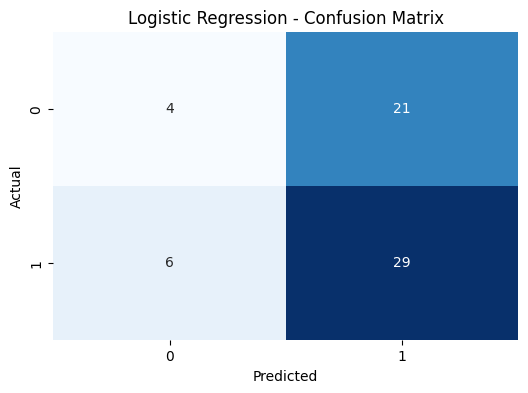


Logistic Regression - Evaluation Metrics:
Accuracy: 0.5500
Precision: 0.5800
Recall: 0.8286
F1 Score: 0.6824

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.16      0.23        25
           1       0.58      0.83      0.68        35

    accuracy                           0.55        60
   macro avg       0.49      0.49      0.46        60
weighted avg       0.51      0.55      0.49        60



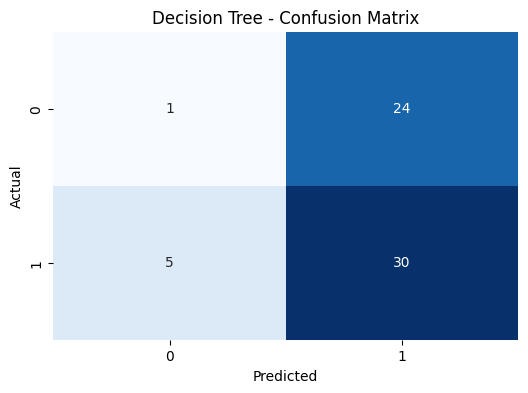


Decision Tree - Evaluation Metrics:
Accuracy: 0.5167
Precision: 0.5556
Recall: 0.8571
F1 Score: 0.6742

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.04      0.06        25
           1       0.56      0.86      0.67        35

    accuracy                           0.52        60
   macro avg       0.36      0.45      0.37        60
weighted avg       0.39      0.52      0.42        60



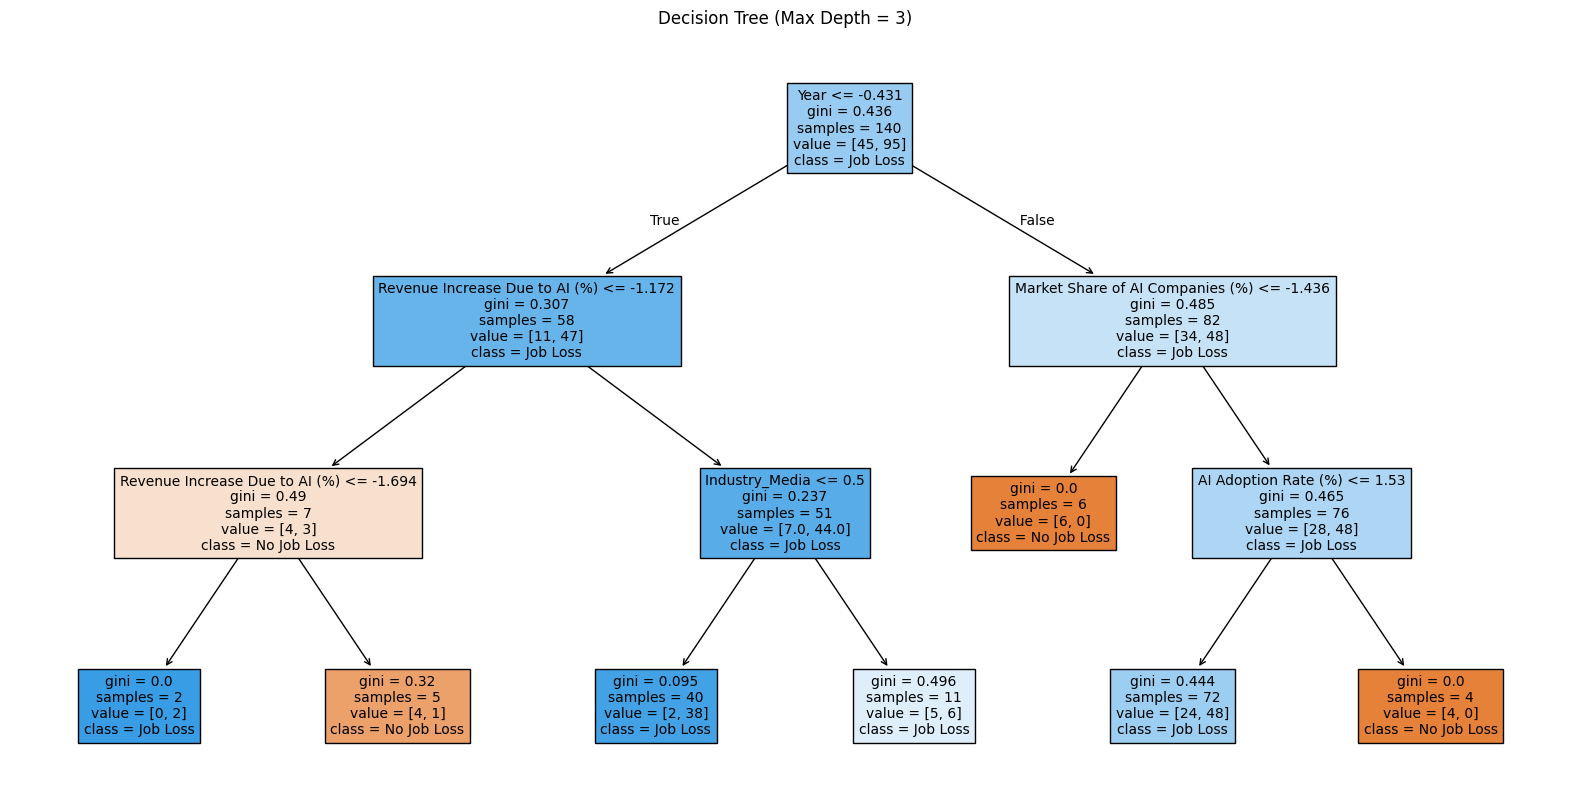

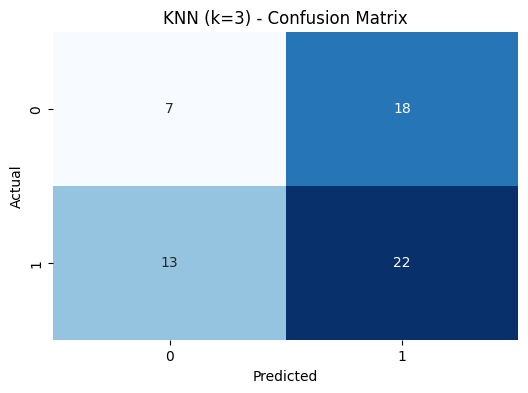


KNN (k=3) - Evaluation Metrics:
Accuracy: 0.4833
Precision: 0.5500
Recall: 0.6286
F1 Score: 0.5867

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.28      0.31        25
           1       0.55      0.63      0.59        35

    accuracy                           0.48        60
   macro avg       0.45      0.45      0.45        60
weighted avg       0.47      0.48      0.47        60



<Figure size 1200x600 with 0 Axes>

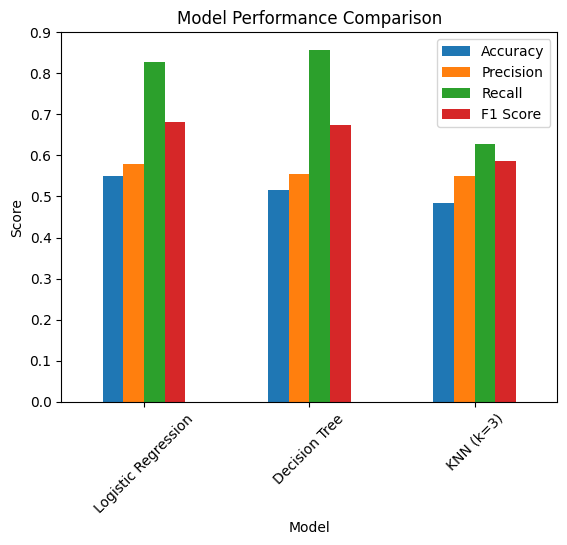


Overall Model Performance:

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.550000   0.580000  0.828571  0.682353
Decision Tree        0.516667   0.555556  0.857143  0.674157
KNN (k=3)            0.483333   0.550000  0.628571  0.586667


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# ----------------------------
# 1. Prepare Data
# ----------------------------
data['Job Loss Binary'] = (data['Job Loss Due to AI (%)'] > 20).astype(int)

X = data[['Country', 'Year', 'Industry', 'AI Adoption Rate (%)', 
        'AI-Generated Content Volume (TBs per year)', 'Revenue Increase Due to AI (%)', 
        'Human-AI Collaboration Rate (%)', 'Consumer Trust in AI (%)', 
        'Market Share of AI Companies (%)', 'Regulation Status']]
y = data['Job Loss Binary']

categorical_features = ['Country', 'Industry', 'Regulation Status']
numerical_features = ['Year', 'AI Adoption Rate (%)', 'AI-Generated Content Volume (TBs per year)',
                    'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
                    'Consumer Trust in AI (%)', 'Market Share of AI Companies (%)']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# ----------------------------
# 2. Define Models
# ----------------------------
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3),
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----------------------------
# 3. Train and Evaluate Models
# ----------------------------
results = []
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, accuracy, precision, recall, f1))
    
    print(f"\n{name} - Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot Decision Tree (if applicable)
    if isinstance(model, DecisionTreeClassifier):
        plt.figure(figsize=(20, 10))
        feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
        plot_tree(model, filled=True, feature_names=feature_names, 
                  class_names=['No Job Loss', 'Job Loss'], max_depth=3, fontsize=10)
        plt.title(f"{name} (Max Depth = 3)")
        plt.show()

# ----------------------------
# 4. Model Comparison
# ----------------------------
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df.set_index('Model', inplace=True)

plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

print('\nOverall Model Performance:\n')
print(results_df.sort_values(by='F1 Score', ascending=False))
